In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import minimize

$$
\sum_{i=1}^N w_i = 1 \quad \text{and} \quad w_i \geq 0 \quad 
$$

# Import and inspect data

In [54]:
df = pd.read_csv('combined_data.csv')
df['date'] = pd.to_datetime(df['date'])

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 51 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    157 non-null    datetime64[ns]
 1   AL      157 non-null    int64         
 2   AD      157 non-null    int64         
 3   AM      157 non-null    int64         
 4   AT      157 non-null    int64         
 5   AZ      157 non-null    int64         
 6   BY      157 non-null    int64         
 7   BE      157 non-null    int64         
 8   BA      157 non-null    int64         
 9   BG      157 non-null    int64         
 10  HR      157 non-null    int64         
 11  CY      157 non-null    int64         
 12  CZ      157 non-null    int64         
 13  DK      157 non-null    int64         
 14  EE      157 non-null    int64         
 15  FO      157 non-null    int64         
 16  FI      157 non-null    int64         
 17  FR      157 non-null    int64         
 18  GE      15

In [56]:
df.describe()

,date,AL,AD,AM,AT,AZ,BY,BE,BA,BG,...,RU,RS,SK,SI,ES,SE,CH,TR,UA,GB
count,157,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,...,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,2022-11-27 00:00:00,50.847134,56.401274,50.152866,49.146497,52.159236,60.808917,49.687898,59.961783,46.388535,...,50.025478,61.407643,58.394904,49.751592,50.222930,58.961783,45.242038,53.885350,52.299363,57.942675
min,2021-05-30 00:00:00,38.000000,25.000000,33.000000,37.000000,37.000000,43.000000,34.000000,38.000000,32.000000,...,36.000000,40.000000,39.000000,35.000000,33.000000,46.000000,34.000000,40.000000,35.000000,48.000000
25%,2022-02-27 00:00:00,45.000000,45.000000,44.000000,43.000000,47.000000,53.000000,44.000000,54.000000,41.000000,...,43.000000,55.000000,51.000000,45.000000,45.000000,53.000000,40.000000,48.000000,47.000000,53.000000
50%,2022-11-27 00:00:00,49.000000,54.000000,48.000000,47.000000,51.000000,59.000000,47.000000,60.000000,44.000000,...,47.000000,61.000000,57.000000,48.000000,48.000000,57.000000,43.000000,52.000000,51.000000,55.000000
75%,2023-08-27 00:00:00,54.000000,68.000000,54.000000,51.000000,55.000000,67.000000,52.000000,65.000000,49.000000,...,56.000000,66.000000,62.000000,52.000000,53.000000,61.000000,47.000000,58.000000,54.000000,61.000000
max,2024-05-26 00:00:00,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
std,NaN,9.859374,16.328306,9.529418,9.403910,8.920956,10.140762,9.553395,9.374601,9.277523,...,10.834980,9.748080,10.802871,9.065047,9.280251,9.153874,9.727967,8.309686,9.385248,8.702521


In [57]:
df

,date,AL,AD,AM,AT,AZ,BY,BE,BA,BG,...,RU,RS,SK,SI,ES,SE,CH,TR,UA,GB
0,2021-05-30,42,50,33,37,37,47,37,45,38,...,46,41,39,35,33,48,35,42,41,53
1,2021-06-06,47,40,40,42,41,46,34,38,32,...,47,41,40,36,34,53,34,42,48,52
2,2021-06-13,39,29,43,37,42,46,35,42,35,...,50,40,43,35,34,52,34,46,44,50
3,2021-06-20,45,45,39,41,37,43,37,40,33,...,46,41,42,40,37,52,34,45,44,51
4,2021-06-27,46,34,36,43,38,48,42,44,34,...,47,41,43,41,38,55,36,43,45,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,2024-04-28,46,28,46,47,43,52,46,61,44,...,39,54,49,46,44,47,37,44,49,51
153,2024-05-05,39,43,41,46,44,57,44,67,42,...,39,61,53,45,44,47,40,46,51,57
154,2024-05-12,39,45,44,45,46,57,43,57,38,...,37,59,50,45,45,47,38,46,48,51
155,2024-05-19,40,26,43,47,45,54,47,59,41,...,38,58,53,47,44,52,42,46,49,51


# Simulate a placebo intervention

In [58]:
np.random.seed(1234)

# Create intervention flag
mask = (df['date'] >= "2024-04-14") & (df['date'] <= "2024-06-02")
df['intervention'] = mask.astype(int)

row_count = len(df)

# Create intervention uplift
df['uplift_perc'] = np.random.uniform(0.10, 0.20, size=row_count)
df['uplift_abs'] = round(df['uplift_perc'] * df['GB'])
df['y'] = df['GB']
df.loc[df['intervention'] == 1, 'y'] = df['GB'] + df['uplift_abs']

In [59]:
df.tail(10)

,date,AL,AD,AM,AT,AZ,BY,BE,BA,BG,...,ES,SE,CH,TR,UA,GB,intervention,uplift_perc,uplift_abs,y
147,2024-03-24,44,58,42,48,53,57,43,64,40,...,49,50,38,47,46,53,0,0.114244,6.0,53
148,2024-03-31,45,64,46,47,47,50,45,66,35,...,49,53,41,41,49,55,0,0.155247,9.0,55
149,2024-04-07,38,25,43,46,52,52,43,62,36,...,45,51,39,52,48,54,0,0.127304,7.0,54
150,2024-04-14,38,32,38,42,43,50,44,55,40,...,44,50,37,46,49,49,1,0.197450,10.0,59
151,2024-04-21,42,44,45,43,44,52,43,53,40,...,45,51,37,44,46,49,1,0.166779,8.0,57
152,2024-04-28,46,28,46,47,43,52,46,61,44,...,44,47,37,44,49,51,1,0.125565,6.0,57
153,2024-05-05,39,43,41,46,44,57,44,67,42,...,44,47,40,46,51,57,1,0.110831,6.0,63
154,2024-05-12,39,45,44,45,46,57,43,57,38,...,45,47,38,46,48,51,1,0.177618,9.0,60
155,2024-05-19,40,26,43,47,45,54,47,59,41,...,44,52,42,46,49,51,1,0.178248,9.0,60
156,2024-05-26,39,39,45,49,49,53,48,61,40,...,43,53,43,42,49,53,1,0.176160,9.0,62


# Visualise the placebo effect

In [60]:
def synth_plot(df, counterfactual):
    
    plt.figure(figsize=(14, 8))
    sns.set_style("white")

    # Create plot
    sns.lineplot(data=df, x='date', y='y', label='Actual', color='b', linewidth=2.5)
    sns.lineplot(data=df, x='date', y=counterfactual, label='Counterfactual', color='r', linestyle='--', linewidth=2.5)
    plt.title('Synthetic Control Method: Actual vs. Counterfactual', fontsize=24)
    plt.xlabel('Date', fontsize=20)
    plt.ylabel('Metric Value', fontsize=20)
    plt.legend(fontsize=16)
    plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
    plt.xticks(rotation=90)
    plt.grid(True, linestyle='--', alpha=0.5)

    # High the intervention point
    intervention_date = '2024-04-07'
    plt.axvline(pd.to_datetime(intervention_date), color='k', linestyle='--', linewidth=1)
    plt.text(pd.to_datetime(intervention_date), plt.ylim()[1]*0.95, 'Intervention', color='k', fontsize=18, ha='right')

    plt.tight_layout()
    plt.show()

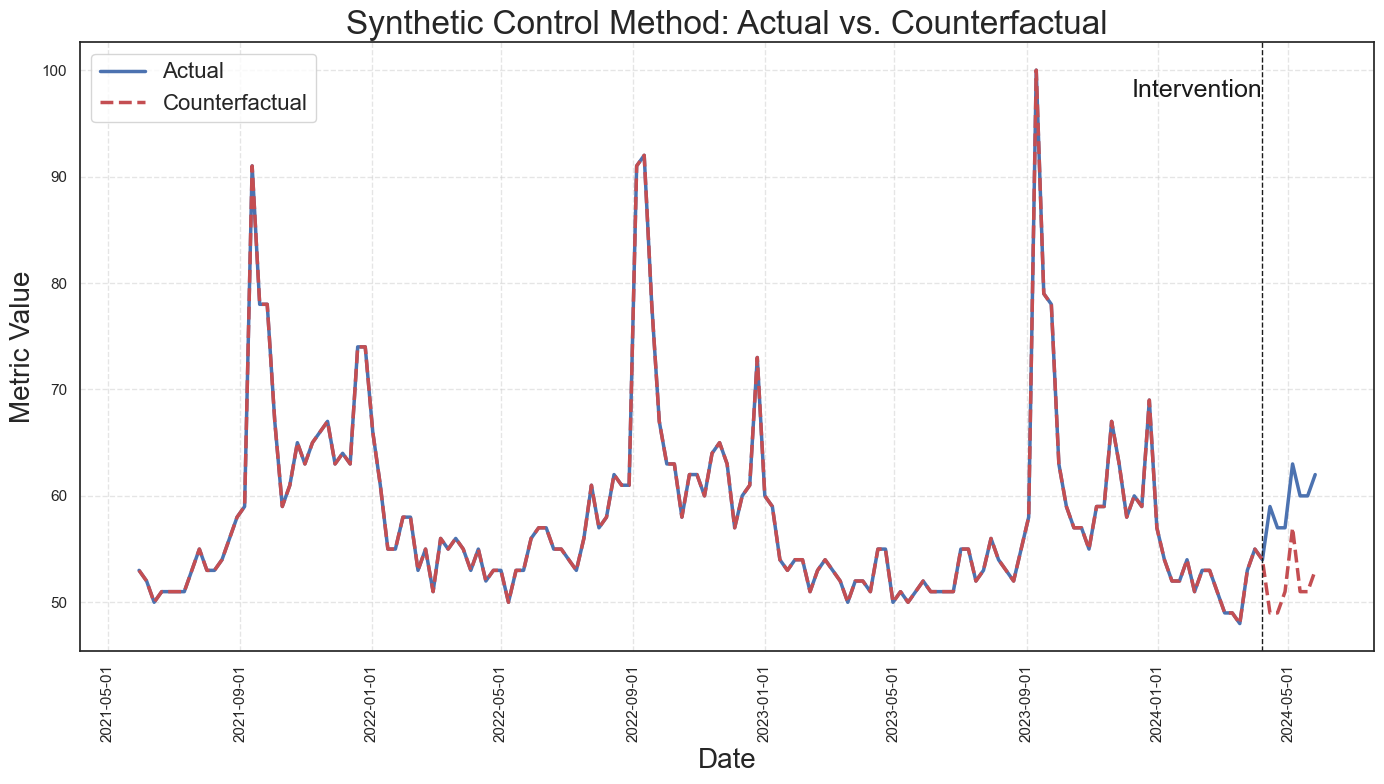

In [61]:
synth_plot(df, 'GB')

# Pre-processing

In [62]:
# Delete the original target column so we don't use it as a feature by accident
del df['GB']

# set feature & targets
X = df.columns[1:50]
y = 'y'

# Train regression models

In [63]:
def train_reg(df, start_index, reg_class):
    
    df_temp = df.iloc[start_index:].copy().reset_index()
    
    X_pre = df_temp[df_temp['intervention'] == 0][X]
    y_pre = df_temp[df_temp['intervention'] == 0][y]
    
    X_train, X_test, y_train, y_test = train_test_split(X_pre, y_pre, test_size=0.10, random_state=42)
    
    model = reg_class
    model.fit(X_train, y_train)

    yhat_train = model.predict(X_train)
    yhat_test = model.predict(X_test)

    mse_train = mean_squared_error(y_train, yhat_train)
    mse_test = mean_squared_error(y_test, yhat_test)
    print(f"Mean Squared Error train: {round(mse_train, 2)}")
    print(f"Mean Squared Error test: {round(mse_test, 2)}")

    r2_train = r2_score(y_train, yhat_train)
    r2_test = r2_score(y_test, yhat_test)
    print(f"R2 train: {round(r2_train, 2)}")
    print(f"R2 test: {round(r2_test, 2)}")
    
    df_temp['pred'] = model.predict(df_temp.loc[:, X])
    df_temp['delta'] = df_temp['y'] - df_temp['pred']

    pred_lift = df_temp[df_temp['intervention'] == 1]['delta'].sum()
    actual_lift = df_temp[df_temp['intervention'] == 1]['uplift_abs'].sum()
    abs_error_perc = abs(pred_lift - actual_lift) / actual_lift
    print(f"Predicted lift: {round(pred_lift, 2)}")
    print(f"Actual lift: {round(actual_lift, 2)}")
    print(f"Absolute error percentage: {round(abs_error_perc, 2)}")
    
    return df_temp, abs_error_perc

In [64]:
df_lin_reg_00, pred_lift_lin_reg_00 = train_reg(df, 0, LinearRegression())

Mean Squared Error train: 2.35
Mean Squared Error test: 6.59
R2 train: 0.97
R2 test: 0.86
Predicted lift: 53.84
Actual lift: 57.0
Absolute error percentage: 0.06


In [66]:
df_lin_reg_100, pred_lift_lin_reg_100 = train_reg(df, 100, LinearRegression())

Mean Squared Error train: 0.0
Mean Squared Error test: 37.64
R2 train: 1.0
R2 test: -0.86
Predicted lift: 68.01
Actual lift: 57.0
Absolute error percentage: 0.19


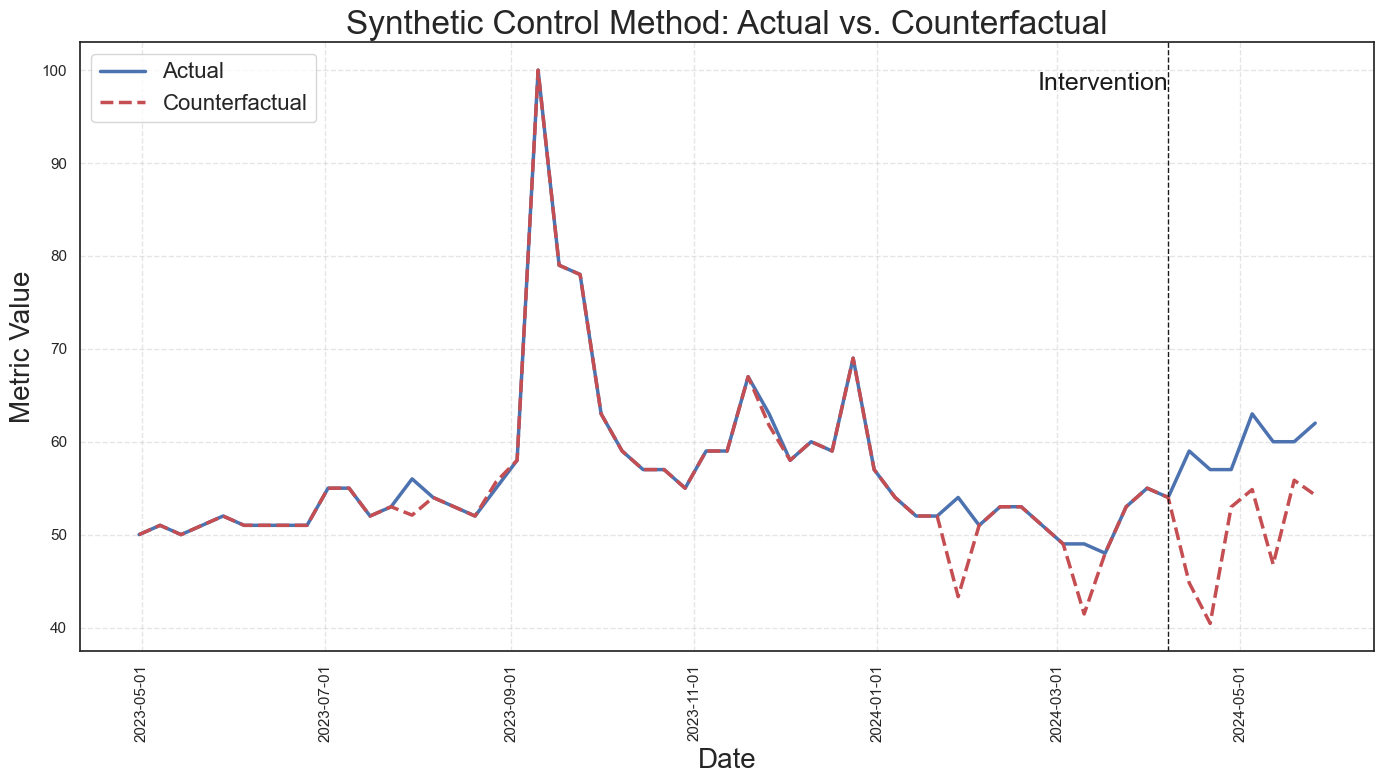

In [67]:
synth_plot(df_lin_reg_100, 'pred')

In [68]:
df_ridge_00, pred_lift_ridge_00 = train_reg(df, 0, RidgeCV())

Mean Squared Error train: 2.35
Mean Squared Error test: 6.47
R2 train: 0.97
R2 test: 0.86
Predicted lift: 53.92
Actual lift: 57.0
Absolute error percentage: 0.05


In [70]:
df_ridge_100, pred_lift_ridge_100 = train_reg(df, 100, RidgeCV())

Mean Squared Error train: 0.1
Mean Squared Error test: 2.75
R2 train: 1.0
R2 test: 0.86
Predicted lift: 52.15
Actual lift: 57.0
Absolute error percentage: 0.09


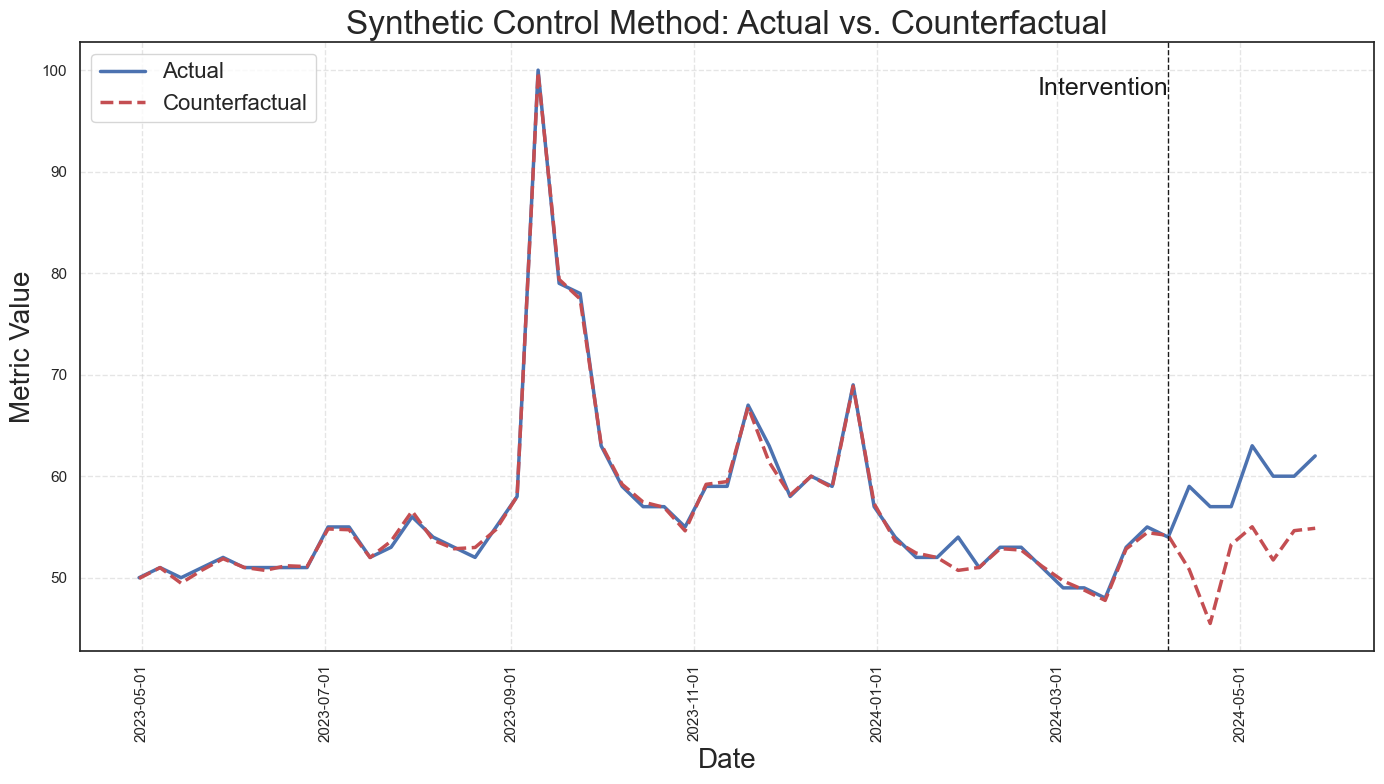

In [71]:
synth_plot(df_ridge_100, 'pred')

In [72]:
df_lasso_00, pred_lift_lasso_00 = train_reg(df, 0, LassoCV())

Mean Squared Error train: 3.13
Mean Squared Error test: 4.72
R2 train: 0.96
R2 test: 0.9
Predicted lift: 53.76
Actual lift: 57.0
Absolute error percentage: 0.06


In [74]:
df_lasso_100, pred_lift_lasso_100 = train_reg(df, 100, LassoCV())

c:\Users\ryan.sullivan\OneDrive - Entain Group\Documents\ryan\repo\personal\causal_graphs\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.448e-01, tolerance: 3.427e-01
  model = cd_fast.enet_coordinate_descent(


Mean Squared Error train: 1.56
Mean Squared Error test: 2.33
R2 train: 0.98
R2 test: 0.88
Predicted lift: 54.88
Actual lift: 57.0
Absolute error percentage: 0.04


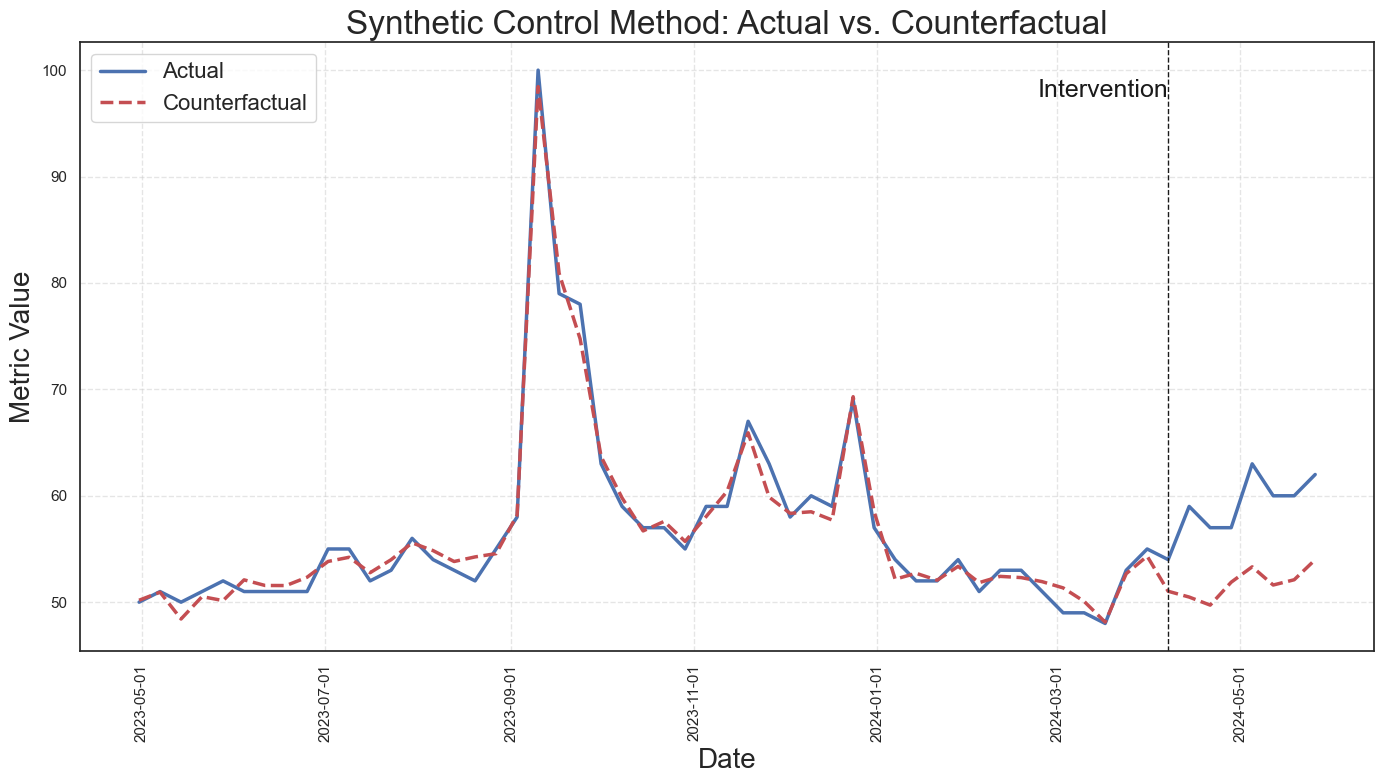

In [75]:
synth_plot(df_lasso_100, 'pred')

# Synthetic control method

In [76]:
def synthetic_control(weights, control_units, treated_unit):
    
    synthetic = np.dot(control_units.values, weights)
    
    return np.sqrt(np.sum((treated_unit - synthetic)**2))

In [77]:
def train_synth(df, start_index):
    
    df_temp = df.iloc[start_index:].copy().reset_index()
    
    X_pre = df_temp[df_temp['intervention'] == 0][X]
    y_pre = df_temp[df_temp['intervention'] == 0][y]
    
    X_train, X_test, y_train, y_test = train_test_split(X_pre, y_pre, test_size=0.10, random_state=42)
    
    initial_weights = np.ones(len(X)) / len(X)

    constraints = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1})

    bounds = [(0, 1) for _ in range(len(X))]

    result = minimize(synthetic_control, 
                     initial_weights, 
                     args=(X_train, y_train),
                     method='SLSQP', 
                     bounds=bounds, 
                     constraints=constraints,
                     options={'disp': False, 'maxiter': 1000, 'ftol': 1e-9},
    )
    
    optimal_weights = result.x
    
    yhat_train = np.dot(X_train.values, optimal_weights)
    yhat_test = np.dot(X_test.values, optimal_weights)
    
    mse_train = mean_squared_error(y_train, yhat_train)
    mse_test = mean_squared_error(y_test, yhat_test)
    print(f"Mean Squared Error train: {round(mse_train, 2)}")
    print(f"Mean Squared Error test: {round(mse_test, 2)}")

    r2_train = r2_score(y_train, yhat_train)
    r2_test = r2_score(y_test, yhat_test)
    print(f"R2 train: {round(r2_train, 2)}")
    print(f"R2 test: {round(r2_test, 2)}")    
    
    df_temp['pred'] = np.dot(df_temp.loc[:, X].values, optimal_weights)
    df_temp['delta'] = df_temp['y'] - df_temp['pred']

    pred_lift = df_temp[df_temp['intervention'] == 1]['delta'].sum()
    actual_lift = df_temp[df_temp['intervention'] == 1]['uplift_abs'].sum()
    abs_error_perc = abs(pred_lift - actual_lift) / actual_lift
    print(f"Predicted lift: {round(pred_lift, 2)}")
    print(f"Actual lift: {round(actual_lift, 2)}")
    print(f"Absolute error percentage: {round(abs_error_perc, 2)}")
    
    return df_temp, abs_error_perc

In [78]:
df_synth_00, pred_lift_synth_00 = train_synth(df, 0)

Mean Squared Error train: 5.4
Mean Squared Error test: 6.5
R2 train: 0.93
R2 test: 0.86
Predicted lift: 52.92
Actual lift: 57.0
Absolute error percentage: 0.07


In [80]:
df_synth_100, pred_lift_synth_100 = train_synth(df, 100)

Mean Squared Error train: 2.15
Mean Squared Error test: 5.02
R2 train: 0.97
R2 test: 0.75
Predicted lift: 57.49
Actual lift: 57.0
Absolute error percentage: 0.01


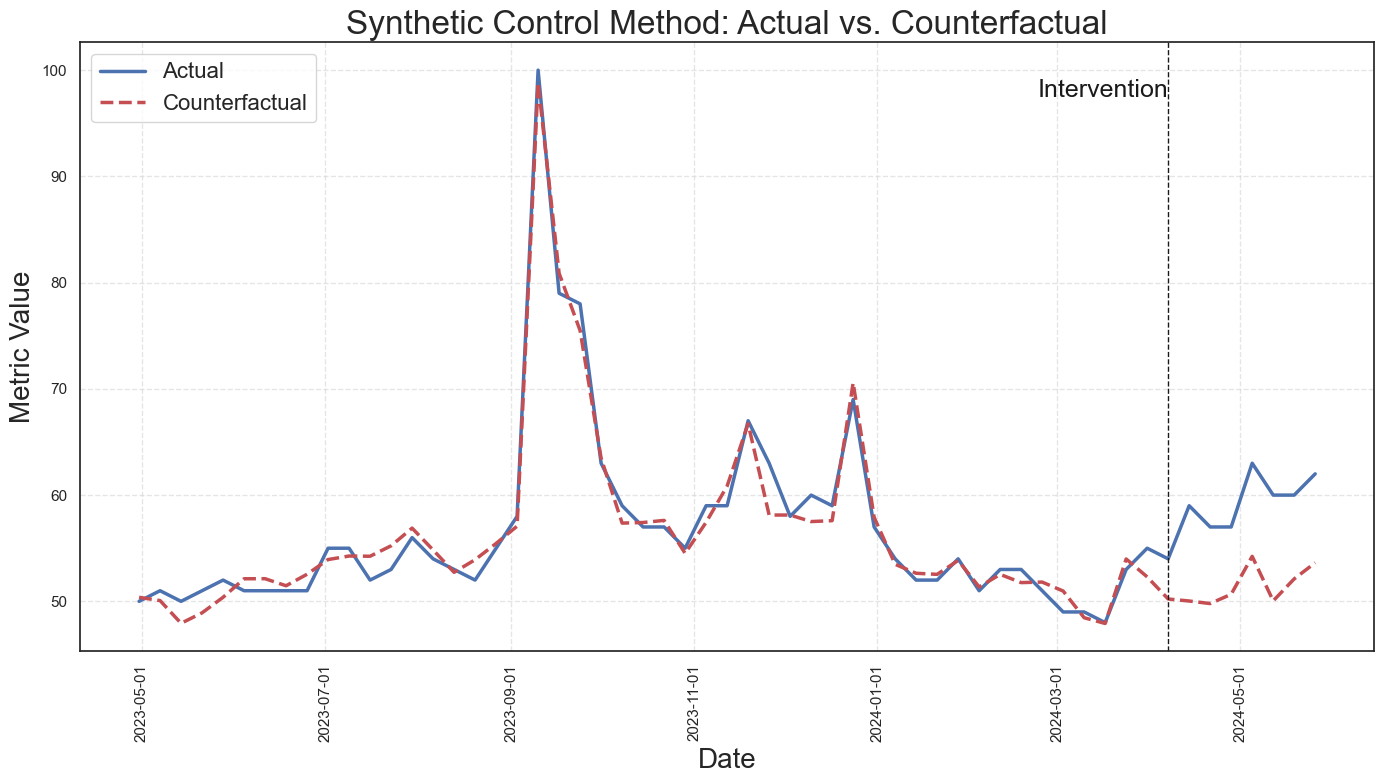

In [81]:
synth_plot(df_synth_100, 'pred')

# Collate results

In [96]:
# run regression experiments
df_lin_reg_00, pred_lift_lin_reg_00 = train_reg(df, 0, LinearRegression())
df_lin_reg_100, pred_lift_lin_reg_100 = train_reg(df, 100, LinearRegression())
df_ridge_00, pred_lift_ridge_00 = train_reg(df, 0, RidgeCV())
df_ridge_100, pred_lift_ridge_100 = train_reg(df, 100, RidgeCV())
df_lasso_00, pred_lift_lasso_00 = train_reg(df, 0, LassoCV())
df_lasso_100, pred_lift_lasso_100 = train_reg(df, 100, LassoCV())

# run synthetic control experiments
df_synth_00, pred_lift_synth_00 = train_synth(df, 0)
df_synth_100, pred_lift_synth_100 = train_synth(df, 100)

Mean Squared Error train: 2.35
Mean Squared Error test: 6.59
R2 train: 0.97
R2 test: 0.86
Predicted lift: 53.84
Actual lift: 57.0
Absolute error percentage: 0.06
Mean Squared Error train: 0.0
Mean Squared Error test: 37.64
R2 train: 1.0
R2 test: -0.86
Predicted lift: 68.01
Actual lift: 57.0
Absolute error percentage: 0.19
Mean Squared Error train: 2.35
Mean Squared Error test: 6.47
R2 train: 0.97
R2 test: 0.86
Predicted lift: 53.92
Actual lift: 57.0
Absolute error percentage: 0.05
Mean Squared Error train: 0.1
Mean Squared Error test: 2.75
R2 train: 1.0
R2 test: 0.86
Predicted lift: 52.15
Actual lift: 57.0
Absolute error percentage: 0.09
Mean Squared Error train: 3.13
Mean Squared Error test: 4.72
R2 train: 0.96
R2 test: 0.9
Predicted lift: 53.76
Actual lift: 57.0
Absolute error percentage: 0.06


c:\Users\ryan.sullivan\OneDrive - Entain Group\Documents\ryan\repo\personal\causal_graphs\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.448e-01, tolerance: 3.427e-01
  model = cd_fast.enet_coordinate_descent(


Mean Squared Error train: 1.56
Mean Squared Error test: 2.33
R2 train: 0.98
R2 test: 0.88
Predicted lift: 54.88
Actual lift: 57.0
Absolute error percentage: 0.04
Mean Squared Error train: 5.4
Mean Squared Error test: 6.5
R2 train: 0.93
R2 test: 0.86
Predicted lift: 52.92
Actual lift: 57.0
Absolute error percentage: 0.07
Mean Squared Error train: 2.15
Mean Squared Error test: 5.02
R2 train: 0.97
R2 test: 0.75
Predicted lift: 57.49
Actual lift: 57.0
Absolute error percentage: 0.01


In [97]:
experiment_data = {
    "Method": ["Linear", "Linear", "Ridge", "Ridge", "Lasso", "Lasso", "Synthetic Control", "Synthetic Control"],
    "Data Size": ["Large", "Small", "Large", "Small", "Large",  "Small", "Large", "Small"],
    "Value": [pred_lift_lin_reg_00, pred_lift_lin_reg_100, pred_lift_ridge_00, pred_lift_ridge_100,pred_lift_lasso_00, pred_lift_lasso_100, pred_lift_synth_00, pred_lift_synth_100]
}

df_experiments = pd.DataFrame(experiment_data)

c:\Users\ryan.sullivan\OneDrive - Entain Group\Documents\ryan\repo\personal\causal_graphs\venv\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\ryan.sullivan\OneDrive - Entain Group\Documents\ryan\repo\personal\causal_graphs\venv\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


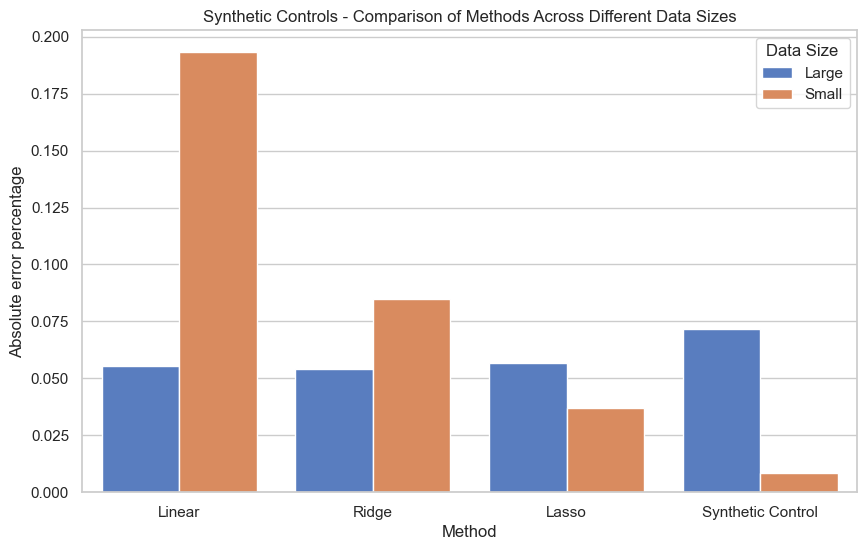

In [98]:
# Set the style
sns.set_style="whitegrid"

# Create the bar plot
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x="Method", y="Value", hue="Data Size", data=df_experiments, palette="muted")

# Add labels and title
plt.xlabel("Method")
plt.ylabel("Absolute error percentage")
plt.title("Synthetic Controls - Comparison of Methods Across Different Data Sizes")
plt.legend(title="Data Size")

# Show the plot
plt.show()